### 2. the bias towards lower ranking, but conservative leaning law school graduates

In [1]:
import csv
import networkx as nx
import collections

#G = nx.Graph()
G = nx.DiGraph() 

In [2]:
# Add Nodes Persone

# all_noemploy.csv

with open('all_noemploy.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    

    #american_center_for_law_and_justice	christian_legal_society_bar_association	federalist_society	heritage_foundation	national_rifle_association_tie	republican_national_lawyers_association_tie
    
    # add nodes
    id = 0
    for row in reader:
        G.add_node(id,
                   type = row['source'],
                   person = row['person'],
                   name = row['person'],
                   position_current = row['position_current'],
                   law = row['law'],
                   law_conservative_score = row['law_conservative_score'],
                   law_rank = row['law_rank'],
                   political_affiliation = row['political_affiliation'],
                  
                   #value of emberships
                   american_center_for_law_and_justice = row['american_center_for_law_and_justice'],
                   christian_legal_society_bar_association = row['christian_legal_society_bar_association'],
                   federalist_society = row['federalist_society'],
                   heritage_foundation = row['heritage_foundation'],
                   national_rifle_association_tie = row['national_rifle_association_tie'],
                   republican_national_lawyers_association_tie = row['republican_national_lawyers_association_tie']
                  )
        
        id+=1

In [3]:
#make dict individual law schools

listLaw = list()
dictLaw = dict()
with open('all_noemploy.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['law'] not in listLaw:
            #print(row['law'])
            listLaw.append(row['law'])
            dictLaw[row['law']] = {'law_conservative_score':row['law_conservative_score'],'law_rank':row['law_rank']}
    
del dictLaw['NA']

In [4]:
# + add nodes law

id = 400
for k,v in dictLaw.items():
        
    G.add_node(id, name = k,name_law = k,type = 'law',
               law_conservative_score = v['law_conservative_score'],
               law_rank = v['law_rank'])

    id +=1

In [5]:
#add colore rank to consrvative score

for node in G.nodes.data():
    if node[1]['type'] == 'law':
        # color conservative rank
        if node[1]['law_conservative_score'] == 'NA':
            G.nodes[node[0]]['color_rank'] = 'grey_NA'
            continue

        if int(node[1]['law_conservative_score']) in range(0,51):
            G.nodes[node[0]]['color_rank'] = 'green'
        if int(node[1]['law_conservative_score']) in range(51,101):
            G.nodes[node[0]]['color_rank'] = 'orange'
        if int(node[1]['law_conservative_score'])in range(101,201):
            G.nodes[node[0]]['color_rank'] = 'red'

In [6]:
# prepare id nodes of law for 'find_id_node()'
# make new dictLaw with {id:name, ...}  it is equal nodes law but useful for step below 
dictLaw = dict()
for node in G.nodes.data():
    if node[1]['type'] == 'law':
        
        dictLaw[node[0]] = node[1]['name']

In [7]:
def find_id_node(dictOfWords,SearchStr):
    listOfKeys = [key  for (key, value) in dictOfWords.items() if value == SearchStr]
    return listOfKeys[0]

In [8]:
#add edges between law & prosecutors
for node in G.nodes.data():
    if node[1]['type'] != 'law':
        try:
            G.add_edge(node[0],find_id_node(dictLaw,node[1]['law']))   
        except:
            n = 1+1

In [9]:
G.edges

OutEdgeView([(0, 400), (1, 401), (2, 402), (3, 403), (4, 404), (5, 405), (6, 406), (7, 407), (8, 408), (10, 409), (11, 410), (12, 411), (13, 412), (14, 413), (15, 414), (16, 415), (17, 416), (18, 417), (20, 402), (21, 418), (22, 419), (23, 420), (24, 421), (25, 422), (26, 423), (27, 424), (28, 422), (29, 425), (30, 426), (31, 426), (33, 427), (34, 428), (35, 429), (37, 418), (38, 430), (40, 431), (41, 432), (42, 433), (43, 422), (44, 434), (45, 407), (46, 435), (47, 436), (48, 437), (49, 438), (50, 438), (51, 439), (52, 422), (53, 440), (54, 441), (55, 442), (56, 443), (57, 444), (58, 445), (59, 445), (60, 422), (61, 439), (62, 446), (63, 447), (64, 443), (65, 448), (66, 449), (67, 450), (68, 451), (69, 452), (70, 453), (71, 414), (72, 422), (73, 454), (74, 455), (75, 456), (76, 456), (77, 457), (78, 458), (80, 429), (81, 459), (82, 460), (84, 422), (88, 422), (89, 407), (92, 461), (93, 462), (94, 422), (95, 422), (96, 463), (97, 413)])

In [10]:
#Analise for in_degree 
for node in G.nodes.data():
    G.nodes[node[0]]['predecessors'] = len(list(G.predecessors(node[0])))

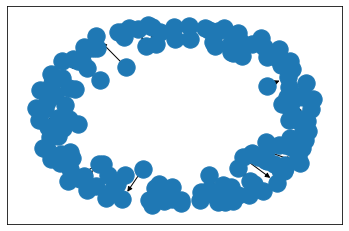

In [11]:
#check net
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [12]:
#convert net for Gephi
nx.write_gexf(G, "2_law_school.gexf")